In [272]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import joblib
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [273]:
bikes=pd.read_csv('bikes.csv')
bikes.head()

,model_name,model_year,kms_driven,owner,location,mileage,power,price
0,Bajaj Avenger Cruise 220 2017,2017,17000 Km,first owner,hyderabad,\n\n 35 kmpl,19 bhp,63500
1,Royal Enfield Classic 350cc 2016,2016,50000 Km,first owner,hyderabad,\n\n 35 kmpl,19.80 bhp,115000
2,Hyosung GT250R 2012,2012,14795 Km,first owner,hyderabad,\n\n 30 kmpl,28 bhp,300000
3,Bajaj Dominar 400 ABS 2017,2017,Mileage 28 Kms,first owner,pondicherry,\n\n 28 Kms,34.50 bhp,100000
4,Jawa Perak 330cc 2020,2020,2000 Km,first owner,bangalore,\n\n,30 bhp,197500


In [274]:
bikes.describe()

,model_year,price
count,7857.000000,7.857000e+03
mean,2015.367698,1.067913e+05
std,4.001443,1.389261e+05
min,1950.000000,0.000000e+00
25%,2014.000000,4.200000e+04
50%,2016.000000,7.500000e+04
75%,2018.000000,1.250000e+05
max,2021.000000,3.000000e+06


In [275]:
bikes.shape

(7857, 8)

In [276]:
bikes.dtypes

model_name    object
model_year     int64
kms_driven    object
owner         object
location      object
mileage       object
power         object
price          int64
dtype: object

In [277]:
bikes["mileage"].str.strip()

0       35 kmpl
1       35 kmpl
2       30 kmpl
3        28 Kms
4              
         ...   
7852    42 kmpl
7853    80 Kmpl
7854    65 kmpl
7855    57 kmpl
7856    38 kmpl
Name: mileage, Length: 7857, dtype: object

# Preprocessing Dataset

Mileage columns

In [278]:
bikes.head()

,model_name,model_year,kms_driven,owner,location,mileage,power,price
0,Bajaj Avenger Cruise 220 2017,2017,17000 Km,first owner,hyderabad,\n\n 35 kmpl,19 bhp,63500
1,Royal Enfield Classic 350cc 2016,2016,50000 Km,first owner,hyderabad,\n\n 35 kmpl,19.80 bhp,115000
2,Hyosung GT250R 2012,2012,14795 Km,first owner,hyderabad,\n\n 30 kmpl,28 bhp,300000
3,Bajaj Dominar 400 ABS 2017,2017,Mileage 28 Kms,first owner,pondicherry,\n\n 28 Kms,34.50 bhp,100000
4,Jawa Perak 330cc 2020,2020,2000 Km,first owner,bangalore,\n\n,30 bhp,197500


In [279]:
bikes["mileage"]= bikes["mileage"].str.strip()

In [280]:
bikes.head()

,model_name,model_year,kms_driven,owner,location,mileage,power,price
0,Bajaj Avenger Cruise 220 2017,2017,17000 Km,first owner,hyderabad,35 kmpl,19 bhp,63500
1,Royal Enfield Classic 350cc 2016,2016,50000 Km,first owner,hyderabad,35 kmpl,19.80 bhp,115000
2,Hyosung GT250R 2012,2012,14795 Km,first owner,hyderabad,30 kmpl,28 bhp,300000
3,Bajaj Dominar 400 ABS 2017,2017,Mileage 28 Kms,first owner,pondicherry,28 Kms,34.50 bhp,100000
4,Jawa Perak 330cc 2020,2020,2000 Km,first owner,bangalore,,30 bhp,197500


In [281]:
bikes["mileage"] = bikes["mileage"].str.replace(" kmpl", "")

In [282]:
bikes.head()

,model_name,model_year,kms_driven,owner,location,mileage,power,price
0,Bajaj Avenger Cruise 220 2017,2017,17000 Km,first owner,hyderabad,35,19 bhp,63500
1,Royal Enfield Classic 350cc 2016,2016,50000 Km,first owner,hyderabad,35,19.80 bhp,115000
2,Hyosung GT250R 2012,2012,14795 Km,first owner,hyderabad,30,28 bhp,300000
3,Bajaj Dominar 400 ABS 2017,2017,Mileage 28 Kms,first owner,pondicherry,28 Kms,34.50 bhp,100000
4,Jawa Perak 330cc 2020,2020,2000 Km,first owner,bangalore,,30 bhp,197500


In [283]:
bikes["mileage"]=bikes["mileage"].apply(lambda x: x[:2] if isinstance(x, str) else x)

In [284]:
bikes.head()

,model_name,model_year,kms_driven,owner,location,mileage,power,price
0,Bajaj Avenger Cruise 220 2017,2017,17000 Km,first owner,hyderabad,35,19 bhp,63500
1,Royal Enfield Classic 350cc 2016,2016,50000 Km,first owner,hyderabad,35,19.80 bhp,115000
2,Hyosung GT250R 2012,2012,14795 Km,first owner,hyderabad,30,28 bhp,300000
3,Bajaj Dominar 400 ABS 2017,2017,Mileage 28 Kms,first owner,pondicherry,28,34.50 bhp,100000
4,Jawa Perak 330cc 2020,2020,2000 Km,first owner,bangalore,,30 bhp,197500


In [285]:
bikes["mileage"] = bikes["mileage"].astype(int, errors='ignore')

In [286]:
bikes.head()

,model_name,model_year,kms_driven,owner,location,mileage,power,price
0,Bajaj Avenger Cruise 220 2017,2017,17000 Km,first owner,hyderabad,35,19 bhp,63500
1,Royal Enfield Classic 350cc 2016,2016,50000 Km,first owner,hyderabad,35,19.80 bhp,115000
2,Hyosung GT250R 2012,2012,14795 Km,first owner,hyderabad,30,28 bhp,300000
3,Bajaj Dominar 400 ABS 2017,2017,Mileage 28 Kms,first owner,pondicherry,28,34.50 bhp,100000
4,Jawa Perak 330cc 2020,2020,2000 Km,first owner,bangalore,,30 bhp,197500


In [287]:
bikes.dtypes

model_name    object
model_year     int64
kms_driven    object
owner         object
location      object
mileage       object
power         object
price          int64
dtype: object

In [288]:
# Mileage colmn values reflected as string, converting to numeric
bikes["mileage"]=pd.to_numeric(bikes["mileage"].astype(int, errors='ignore').values, errors='coerce')

In [289]:
bikes.dtypes

model_name     object
model_year      int64
kms_driven     object
owner          object
location       object
mileage       float64
power          object
price           int64
dtype: object

In [290]:
bikes.describe()

,model_year,mileage,price
count,7857.000000,7083.000000,7.857000e+03
mean,2015.367698,44.168855,1.067913e+05
std,4.001443,16.531119,1.389261e+05
min,1950.000000,5.000000,0.000000e+00
25%,2014.000000,35.000000,4.200000e+04
50%,2016.000000,40.000000,7.500000e+04
75%,2018.000000,57.000000,1.250000e+05
max,2021.000000,96.000000,3.000000e+06


In [291]:
bikes[bikes["model_name"].str.contains("Jawa")].head()

,model_name,model_year,kms_driven,owner,location,mileage,power,price
4,Jawa Perak 330cc 2020,2020,2000 Km,first owner,bangalore,NaN,30 bhp,197500
157,Jawa Forty Two 295CC 2019,2019,4930 Km,first owner,moradabad,NaN,27 bhp,140000
211,Jawa Forty Two 295CC Dual ABS BS6 2020,2020,5000 Km,first owner,pune,NaN,27 bhp,190000
300,Jawa Forty Two 295CC 2019,2019,600 Km,first owner,ludhiana,NaN,27 bhp,162000
347,Jawa Forty Two 295CC 2019,2019,3200 Km,first owner,ghaziabad,NaN,27 bhp,160000


In [292]:
bikes[bikes["mileage"] == "Li"]

,model_name,model_year,kms_driven,owner,location,mileage,power,price


In [293]:
bikes[bikes['mileage'].isnull()]

,model_name,model_year,kms_driven,owner,location,mileage,power,price
4,Jawa Perak 330cc 2020,2020,2000 Km,first owner,bangalore,NaN,30 bhp,197500
40,Bajaj Discover 110cc 2019,2019,45000 Km,first owner,chittorgarh,NaN,8.60 bhp,46000
50,Royal Enfield Bullet 350cc 2019,2019,27300 Km,first owner,hyderabad,NaN,19.80 bhp,130000
62,Royal Enfield Thunderbird X 350cc ABS 2019,2019,9000 Km,first owner,mumbai,NaN,19.80 bhp,166000
63,TVS Apache RTR 160 4V DISC ABS 2019,2019,21500 Km,first owner,hyderabad,NaN,16.1 bhp,93000
...,...,...,...,...,...,...,...,...
7815,Honda Livo 110cc 2019,2019,15492 Km,first owner,jaipur,NaN,8.25 Bhp,53214
7816,Bajaj Discover 135cc 2010,2010,21728 Km,first owner,chennai,NaN,9.64 kw,16000
7832,Bajaj Discover 135cc 2009,2009,18000 Km,first owner,delhi,NaN,9.64 kw,21000
7837,Bajaj Discover 135cc 2009,2009,25000 Km,first owner,delhi,NaN,9.64 kw,22000


In [294]:
# Engineered a new column for brand name from model_name
brand=lambda x : x.split(" ")[0]
bikes["brand"]=bikes["model_name"].apply(brand)


In [295]:
bikes["brand"].value_counts()

brand
Bajaj               2105
Royal               1750
Hero                 808
Yamaha               747
TVS                  567
Honda                530
KTM                  491
Suzuki               223
Harley-Davidson      171
UM                   128
Kawasaki              67
Hyosung               54
Benelli               53
Jawa                  46
Triumph               36
Mahindra              27
Ducati                16
Husqvarna             11
BMW                   10
BenelliImperiale       6
MV                     2
Fb                     2
Aprilia                2
Ideal                  1
Indian                 1
Moto                   1
Yazdi                  1
yamaha                 1
Name: count, dtype: int64

In [296]:
bikes.pivot_table(index='brand', values='mileage', aggfunc='mean').sort_values(by='mileage', ascending=False)

,mileage
brand,
Honda,56.576000
Hero,52.710938
TVS,51.544086
Suzuki,50.846154
Bajaj,50.025602
Mahindra,49.038462
Yamaha,47.547541
BenelliImperiale,35.000000
UM,35.000000


In [297]:
# Calculate mean mileage per brand
brand_means = bikes.groupby('brand')['mileage'].mean()

# Fillna using map
bikes['mileage'].fillna(bikes['brand'].map(brand_means), inplace=True)


In [298]:
bikes[bikes["brand"] == "Jawa"].head()

,model_name,model_year,kms_driven,owner,location,mileage,power,price,brand
4,Jawa Perak 330cc 2020,2020,2000 Km,first owner,bangalore,NaN,30 bhp,197500,Jawa
157,Jawa Forty Two 295CC 2019,2019,4930 Km,first owner,moradabad,NaN,27 bhp,140000,Jawa
211,Jawa Forty Two 295CC Dual ABS BS6 2020,2020,5000 Km,first owner,pune,NaN,27 bhp,190000,Jawa
300,Jawa Forty Two 295CC 2019,2019,600 Km,first owner,ludhiana,NaN,27 bhp,162000,Jawa
347,Jawa Forty Two 295CC 2019,2019,3200 Km,first owner,ghaziabad,NaN,27 bhp,160000,Jawa


In [299]:
bikes[bikes["brand"] == "BMW"]

,model_name,model_year,kms_driven,owner,location,mileage,power,price,brand
2023,BMW G 310 R 2018,2018,8500 Km,first owner,mumbai,NaN,33 bhp,260000,BMW
2832,BMW G 310 R 2019,2019,9000 Km,first owner,mumbai,NaN,33 bhp,270000,BMW
3400,BMW G 310 R 2019,2019,1500 Km,first owner,chandigarh,NaN,33 bhp,240000,BMW
3827,BMW G 310 R 2019,2019,1200 Km,first owner,patna,NaN,33 bhp,277500,BMW
4154,BMW G 310 GS 2019,2019,22000 Km,first owner,kalyan,NaN,33 bhp,299000,BMW
4392,BMW G 310 GS 2018,2018,10000 Km,first owner,mumbai,NaN,33 bhp,290000,BMW
5435,BMW G 310 R 2019,2019,12872 Km,first owner,pune,NaN,33 bhp,270000,BMW
5586,BMW S 1000 XR Pro 2017,2017,18000 Km,first owner,delhi,NaN,159.80 bhp,1500000,BMW
5727,BMW G 310 R 2020,2020,300 Km,first owner,mumbai,NaN,33 bhp,300000,BMW
6561,BMW G 310 R 2018,2018,5000 Km,first owner,tikamgarh,NaN,33 bhp,272100,BMW


In [300]:
bikes.describe()

,model_year,mileage,price
count,7857.000000,7796.000000,7.857000e+03
mean,2015.367698,44.163491,1.067913e+05
std,4.001443,16.012987,1.389261e+05
min,1950.000000,5.000000,0.000000e+00
25%,2014.000000,35.000000,4.200000e+04
50%,2016.000000,40.000000,7.500000e+04
75%,2018.000000,55.000000,1.250000e+05
max,2021.000000,96.000000,3.000000e+06


In [301]:
bikes["owner"].replace({"first owner": 1, "second owner": 2, "third owner": 3, "fourth owner or more": 4}, inplace=True)

In [302]:
bikes[bikes['mileage'].isnull()]

,model_name,model_year,kms_driven,owner,location,mileage,power,price,brand
4,Jawa Perak 330cc 2020,2020,2000 Km,1,bangalore,NaN,30 bhp,197500,Jawa
157,Jawa Forty Two 295CC 2019,2019,4930 Km,1,moradabad,NaN,27 bhp,140000,Jawa
211,Jawa Forty Two 295CC Dual ABS BS6 2020,2020,5000 Km,1,pune,NaN,27 bhp,190000,Jawa
300,Jawa Forty Two 295CC 2019,2019,600 Km,1,ludhiana,NaN,27 bhp,162000,Jawa
347,Jawa Forty Two 295CC 2019,2019,3200 Km,1,ghaziabad,NaN,27 bhp,160000,Jawa
...,...,...,...,...,...,...,...,...,...
5727,BMW G 310 R 2020,2020,300 Km,1,mumbai,NaN,33 bhp,300000,BMW
5823,Jawa Forty Two 295CC 2019,2019,2000 Km,1,ghaziabad,NaN,27 bhp,155000,Jawa
5994,Jawa Forty Two 295CC 2019,2019,245 Km,1,faridabad,NaN,27 bhp,137800,Jawa
6561,BMW G 310 R 2018,2018,5000 Km,1,tikamgarh,NaN,33 bhp,272100,BMW


## Creating function for cleaning data set

In [303]:
def bike_preprocess(df):
    df["mileage"]= df["mileage"].str.strip()
    df["mileage"] = df["mileage"].str.replace(" kmpl", "")
    df["mileage"]=df["mileage"].apply(lambda x: x[:2] if isinstance(x, str) else x)
    df["mileage"] = df["mileage"].astype(int, errors='ignore')
    # Mileage colmn values reflected as string, converting to numeric
    df["mileage"]=pd.to_numeric(df["mileage"].astype(int, errors='ignore').values, errors='coerce')
    # Engineered a new column for brand name from model_name
    df["brand"] = df["model_name"].apply(lambda x: x.split(" ")[0])
    # Calculate mean mileage per brand
    brand_means = df.groupby('brand')['mileage'].mean()
    # Fillna using map
    df['mileage'].fillna(df['brand'].map(brand_means), inplace=True)
    return df

In [304]:
data1=pd.read_csv('bikes.csv')

In [305]:
bike_preprocess(data1)

,model_name,model_year,kms_driven,owner,location,mileage,power,price,brand
0,Bajaj Avenger Cruise 220 2017,2017,17000 Km,first owner,hyderabad,35.0,19 bhp,63500,Bajaj
1,Royal Enfield Classic 350cc 2016,2016,50000 Km,first owner,hyderabad,35.0,19.80 bhp,115000,Royal
2,Hyosung GT250R 2012,2012,14795 Km,first owner,hyderabad,30.0,28 bhp,300000,Hyosung
3,Bajaj Dominar 400 ABS 2017,2017,Mileage 28 Kms,first owner,pondicherry,28.0,34.50 bhp,100000,Bajaj
4,Jawa Perak 330cc 2020,2020,2000 Km,first owner,bangalore,NaN,30 bhp,197500,Jawa
...,...,...,...,...,...,...,...,...,...
7852,Yamaha YZF-R15 150cc 2011,2011,7000 Km,first owner,agra,42.0,16 bhp,55000,Yamaha
7853,Bajaj Discover 100cc 2015,2015,Mileage 80 Kmpl,first owner,delhi,80.0,7.7,28000,Bajaj
7854,Bajaj Pulsar 180cc 2016,2016,6407 Km,first owner,bangalore,65.0,17 bhp,61740,Bajaj
7855,Bajaj V15 150cc 2016,2016,7524 Km,first owner,bangalore,57.0,11.80 bhp,49000,Bajaj


In [306]:
bikes[bikes["model_name"].str.contains("cc")]

,model_name,model_year,kms_driven,owner,location,mileage,power,price,brand
1,Royal Enfield Classic 350cc 2016,2016,50000 Km,1,hyderabad,35.0,19.80 bhp,115000,Royal
4,Jawa Perak 330cc 2020,2020,2000 Km,1,bangalore,NaN,30 bhp,197500,Jawa
5,KTM Duke 200cc 2012,2012,24561 Km,3,bangalore,35.0,25 bhp,63400,KTM
6,Bajaj Pulsar 180cc 2016,2016,19718 Km,1,bangalore,65.0,17 bhp,55000,Bajaj
8,KTM Duke 390cc 2018,2018,1350 Km,1,jaipur,25.0,42.90 bhp,198000,KTM
...,...,...,...,...,...,...,...,...,...
7852,Yamaha YZF-R15 150cc 2011,2011,7000 Km,1,agra,42.0,16 bhp,55000,Yamaha
7853,Bajaj Discover 100cc 2015,2015,Mileage 80 Kmpl,1,delhi,80.0,7.7,28000,Bajaj
7854,Bajaj Pulsar 180cc 2016,2016,6407 Km,1,bangalore,65.0,17 bhp,61740,Bajaj
7855,Bajaj V15 150cc 2016,2016,7524 Km,1,bangalore,57.0,11.80 bhp,49000,Bajaj


In [307]:
bikes.shape

(7857, 9)

In [308]:
bikes["owner"].unique()

array([1, 3, 2, 4])

In [309]:
bikes.nunique()

model_name    1724
model_year      36
kms_driven    1801
owner            4
location       561
mileage         80
power          272
price         1627
brand           28
dtype: int64

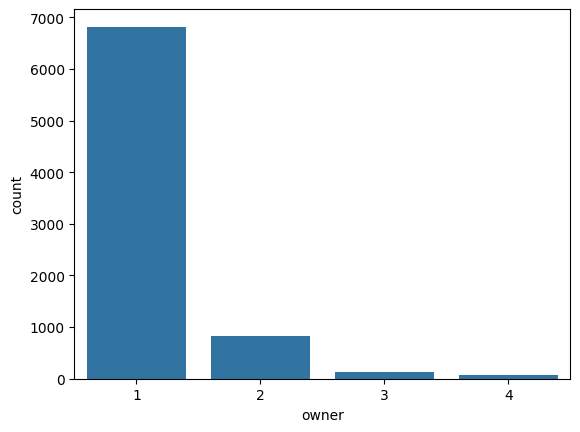

In [310]:
sns.countplot(x="owner", data=bikes);

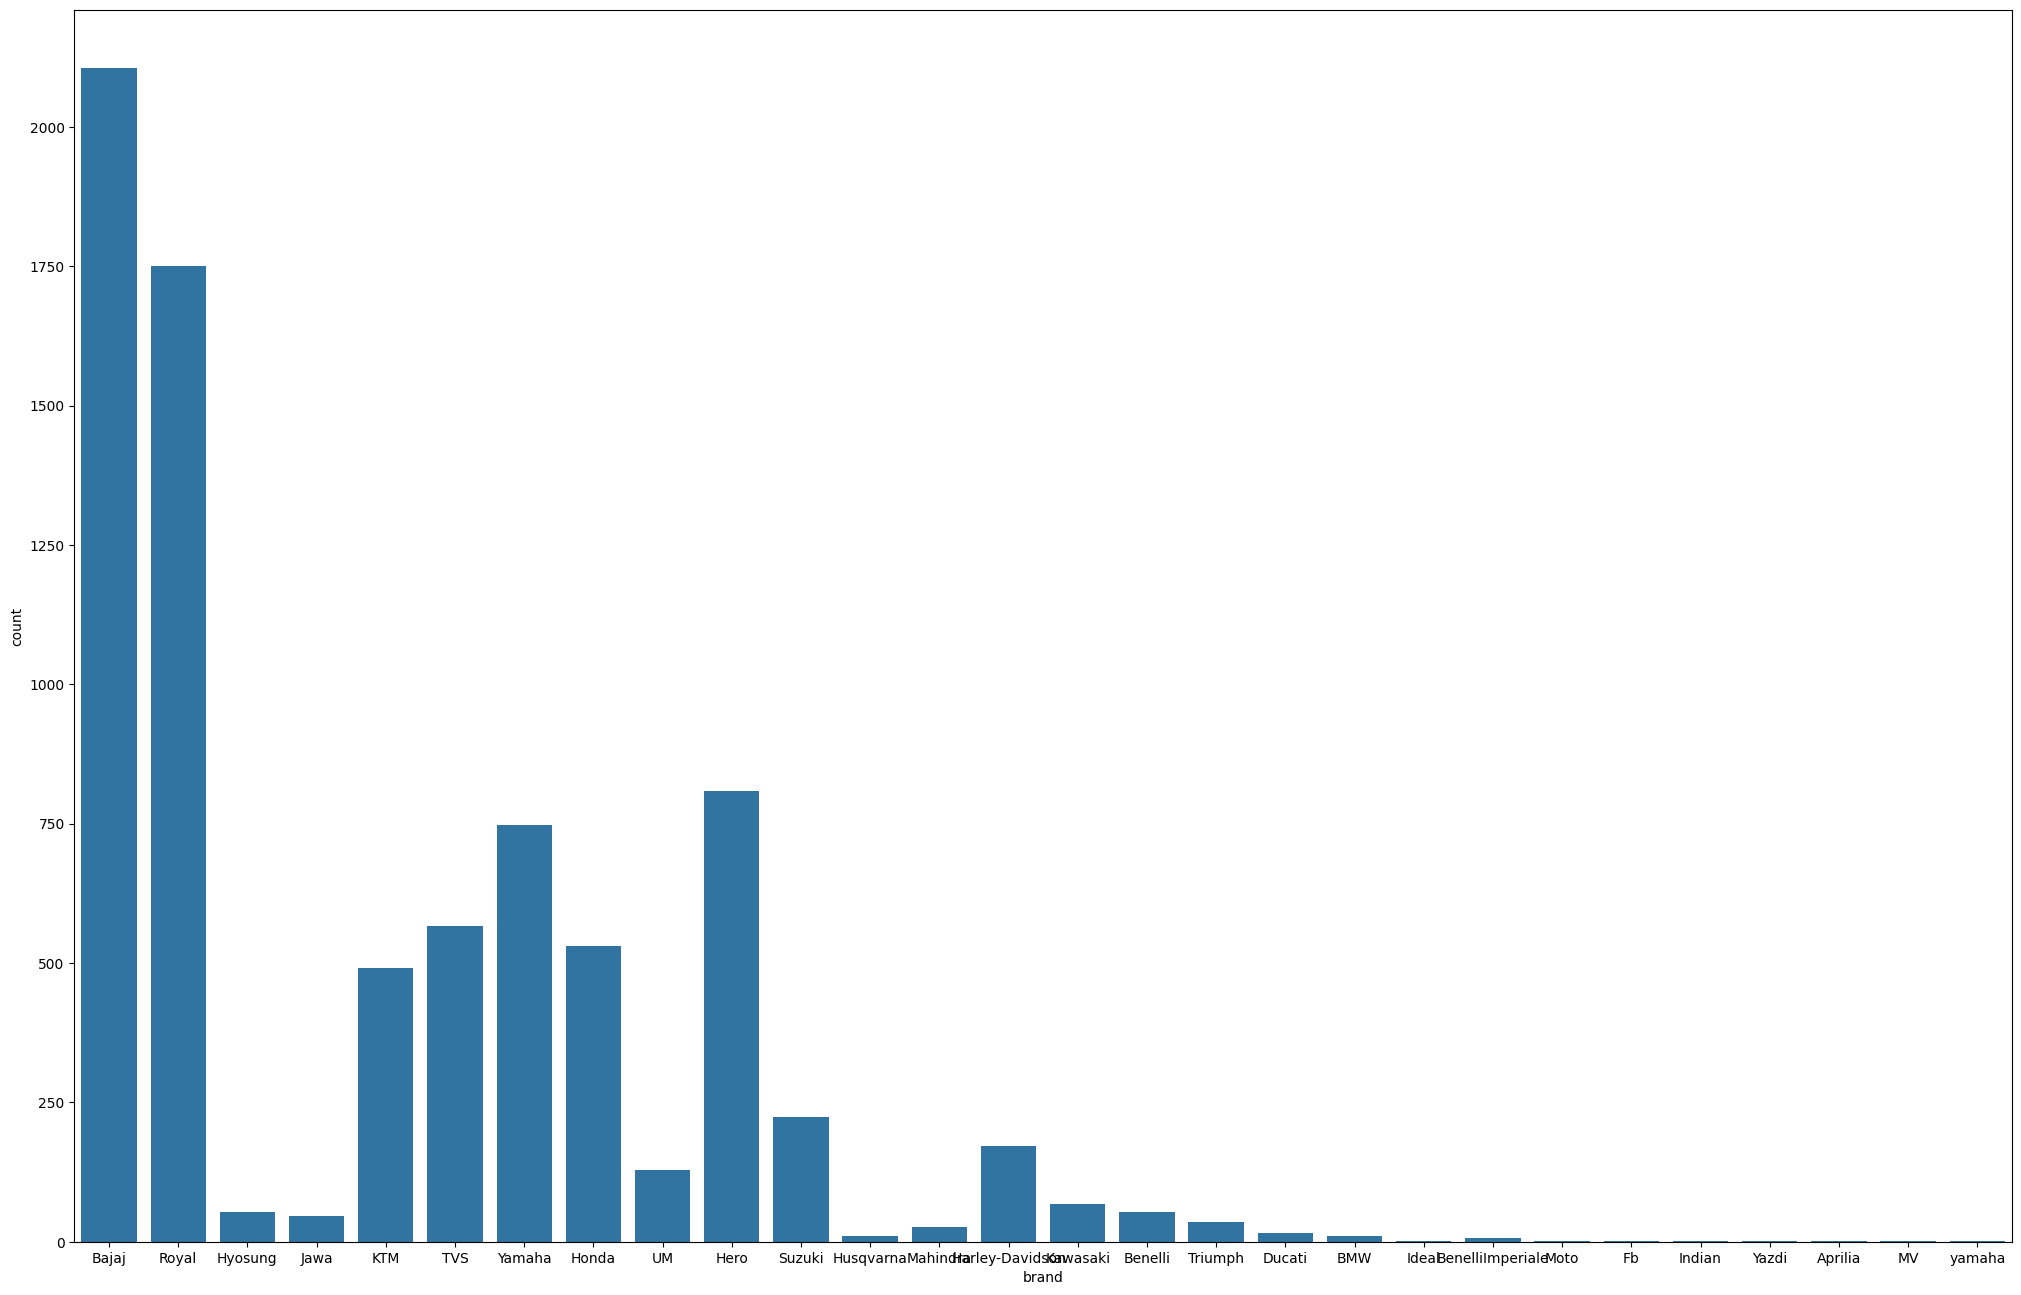

In [311]:
fig, ax = plt.subplots(figsize=(25, 16))
sns.countplot(x="brand", data=bikes, ax=ax);

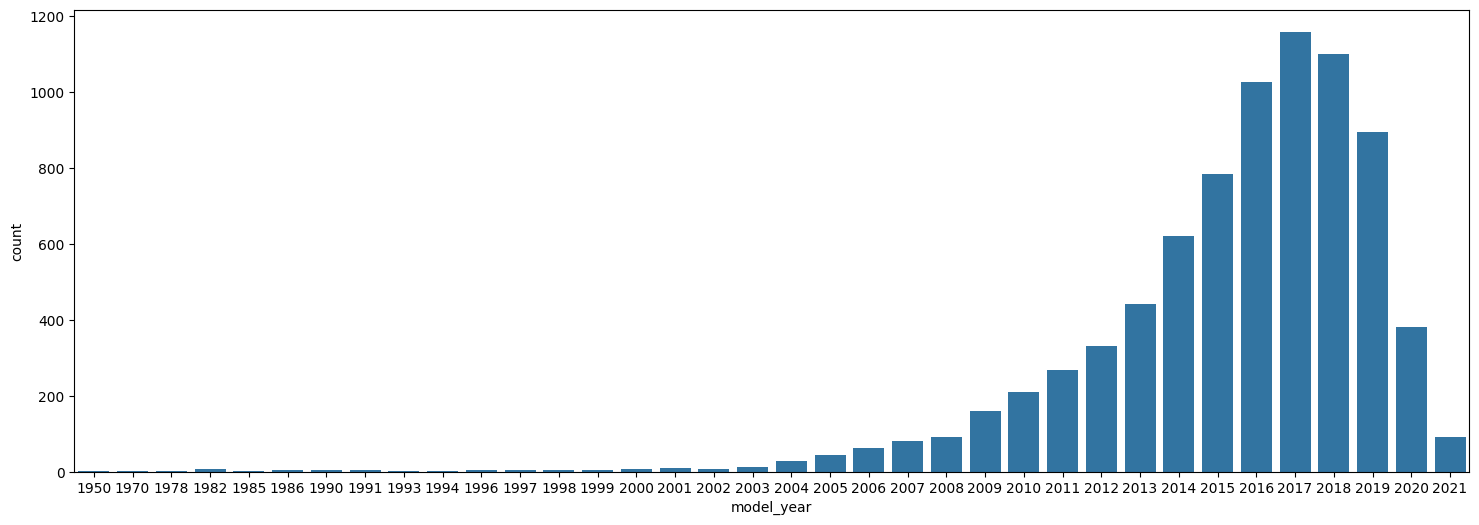

In [312]:
fig, ax = plt.subplots(figsize=(18, 6))
sns.countplot(x="model_year", data=bikes, ax=ax);

In [313]:
bikes["owner"].value_counts()

owner
1    6817
2     833
3     134
4      73
Name: count, dtype: int64

In [314]:
bikes

,model_name,model_year,kms_driven,owner,location,mileage,power,price,brand
0,Bajaj Avenger Cruise 220 2017,2017,17000 Km,1,hyderabad,35.0,19 bhp,63500,Bajaj
1,Royal Enfield Classic 350cc 2016,2016,50000 Km,1,hyderabad,35.0,19.80 bhp,115000,Royal
2,Hyosung GT250R 2012,2012,14795 Km,1,hyderabad,30.0,28 bhp,300000,Hyosung
3,Bajaj Dominar 400 ABS 2017,2017,Mileage 28 Kms,1,pondicherry,28.0,34.50 bhp,100000,Bajaj
4,Jawa Perak 330cc 2020,2020,2000 Km,1,bangalore,NaN,30 bhp,197500,Jawa
...,...,...,...,...,...,...,...,...,...
7852,Yamaha YZF-R15 150cc 2011,2011,7000 Km,1,agra,42.0,16 bhp,55000,Yamaha
7853,Bajaj Discover 100cc 2015,2015,Mileage 80 Kmpl,1,delhi,80.0,7.7,28000,Bajaj
7854,Bajaj Pulsar 180cc 2016,2016,6407 Km,1,bangalore,65.0,17 bhp,61740,Bajaj
7855,Bajaj V15 150cc 2016,2016,7524 Km,1,bangalore,57.0,11.80 bhp,49000,Bajaj


In [315]:
bikes.dtypes

model_name     object
model_year      int64
kms_driven     object
owner           int64
location       object
mileage       float64
power          object
price           int64
brand          object
dtype: object

In [316]:
bikes

,model_name,model_year,kms_driven,owner,location,mileage,power,price,brand
0,Bajaj Avenger Cruise 220 2017,2017,17000 Km,1,hyderabad,35.0,19 bhp,63500,Bajaj
1,Royal Enfield Classic 350cc 2016,2016,50000 Km,1,hyderabad,35.0,19.80 bhp,115000,Royal
2,Hyosung GT250R 2012,2012,14795 Km,1,hyderabad,30.0,28 bhp,300000,Hyosung
3,Bajaj Dominar 400 ABS 2017,2017,Mileage 28 Kms,1,pondicherry,28.0,34.50 bhp,100000,Bajaj
4,Jawa Perak 330cc 2020,2020,2000 Km,1,bangalore,NaN,30 bhp,197500,Jawa
...,...,...,...,...,...,...,...,...,...
7852,Yamaha YZF-R15 150cc 2011,2011,7000 Km,1,agra,42.0,16 bhp,55000,Yamaha
7853,Bajaj Discover 100cc 2015,2015,Mileage 80 Kmpl,1,delhi,80.0,7.7,28000,Bajaj
7854,Bajaj Pulsar 180cc 2016,2016,6407 Km,1,bangalore,65.0,17 bhp,61740,Bajaj
7855,Bajaj V15 150cc 2016,2016,7524 Km,1,bangalore,57.0,11.80 bhp,49000,Bajaj
